### 눈깜빡임 감지

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')


x_train = np.load('dataset/x_train.npy').astype(np.float32)
y_train = np.load('dataset/y_train.npy').astype(np.float32)
x_val = np.load('dataset/x_val.npy').astype(np.float32)
y_val = np.load('dataset/y_val.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)


2023-05-28 19:09:02.559147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


In [3]:
train_datagen = ImageDataGenerator(
	rescale=1./255,
 rotation_range=10,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x=x_train, y=y_train, batch_size=32, shuffle=True)
val_generator = val_datagen.flow(x=x_val, y=y_val, batch_size=32, shuffle=False)

In [4]:
inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 17, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                  

2023-05-28 19:09:09.039045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-28 19:09:09.039098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit_generator(
	train_generator, epochs=50, validation_data=val_generator,
 callbacks=[
	 ModelCheckpoint('models/%s.h5'%(start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
  ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
 ]
)

Epoch 1/50


/var/folders/q5/qkpj78lx0cq03d5wc8y0v97r0000gn/T/ipykernel_4955/369367441.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(
2023-05-28 19:09:10.333119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-28 19:09:10.816114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-28 19:09:10.898368: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


80/81 [============================>.] - ETA: 0s - loss: 0.4488 - acc: 0.7800

2023-05-28 19:09:12.617781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-28 19:09:12.693114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.90625, saving model to models/2023_05_28_19_09_10.h5
81/81 [==============================] - 3s 20ms/step - loss: 0.4476 - acc: 0.7804 - val_loss: 0.2471 - val_acc: 0.9062 - lr: 0.0010
Epoch 2/50
80/81 [============================>.] - ETA: 0s - loss: 0.2399 - acc: 0.9119
Epoch 2: val_acc improved from 0.90625 to 0.95833, saving model to models/2023_05_28_19_09_10.h5
81/81 [==============================] - 1s 16ms/step - loss: 0.2387 - acc: 0.9126 - val_loss: 0.1203 - val_acc: 0.9583 - lr: 0.0010
Epoch 3/50
80/81 [============================>.] - ETA: 0s - loss: 0.1759 - acc: 0.9370
Epoch 3: val_acc did not improve from 0.95833
81/81 [==============================] - 1s 16ms/step - loss: 0.1747 - acc: 0.9374 - val_loss: 0.0709 - val_acc: 0.9583 - lr: 0.0010
Epoch 4/50
80/81 [============================>.] - ETA: 0s - loss: 0.1541 - acc: 0.9561
Epoch 4: val_acc did not improve from 0.95833
81/81 [==============================] - 1s 16ms/s

9/9 [==============================] - 0s 5ms/step
test add : 0.9965277777777778


2023-05-28 19:10:18.774470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Axes: >

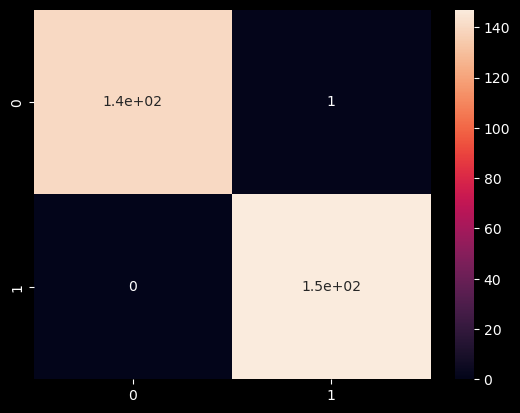

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('models/%s.h5'% (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int0)

print("test add : %s"%accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

### 카메라 모듈 화면 표시 & 얼굴인식

In [1]:
import cv2, dlib
import numpy as np
from imutils import face_utils
from keras.models import load_model

IMG_SIZE = (34, 26)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

model = load_model('models/2023_05_28_18_08_53.h5')
model.summary()

def crop_eye(img, eye_points):
    x1, y1 = np.amin(eye_points, axis=0)
    x2, y2 = np.amin(eye_points, axis=0)
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
    
    w = (x2 -x1) * 1.2
    h = w * IMG_SIZE[1] / IMG_SIZE[0]
    
    margin_x, margin_y = w / 2, h / 2
    
    min_x, min_y = int(cx - margin_x), int(cy - margin_y)
    max_x, max_y = int(cx - margin_x), int(cy + margin_y)
    
    eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(np.int0)
    eye_img = gray[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]]
    
    return (eye_img, eye_rect)

cap = cv2.VideoCapture('http://192.168.0.109:81/stream')

while cap.isOpened():
    ret, img_ori = cap.read()
    
    if not ret:
        print("video road fail")
        break
    
    img_ori = cv2.resize(img_ori, dsize=(0, 0), fx=0.5, fy=0.5)
    
    img = img_ori.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = detector(gray)
    
    for face in faces:
        shapes = predictor(gray, face)
        shapes = face_utils.shape_to_np(shapes)

        eye_img_l, eye_rect_l = crop_eye(gray, eye_points=shapes[36:42])
        eye_img_r, eye_rect_r = crop_eye(gray, eye_points=shapes[42:48])

        eye_img_l = cv2.resize(eye_img_l, dsize=IMG_SIZE)
        eye_img_r = cv2.resize(eye_img_r, dsize=IMG_SIZE)
        eye_img_r = cv2.flip(eye_img_r, flipCode=1)

        cv2.imshow('l', eye_img_l)
        cv2.imshow('r', eye_img_r)

        eye_input_l = eye_img_l.copy().reshape((1, IMG_SIZE[1], IMG_SIZE[0], 1)).astype(np.float32) / 255.
        eye_input_r = eye_img_r.copy().reshape((1, IMG_SIZE[1], IMG_SIZE[0], 1)).astype(np.float32) / 255.

        pred_l = model.predict(eye_input_l)
        pred_r = model.predict(eye_input_r)

        # visualize
        state_l = 'O %.1f' if pred_l > 0.1 else '- %.1f'
        state_r = 'O %.1f' if pred_r > 0.1 else '- %.1f'

        state_l = state_l % pred_l
        state_r = state_r % pred_r

        cv2.rectangle(img, pt1=tuple(eye_rect_l[0:2]), pt2=tuple(eye_rect_l[2:4]), color=(255,255,255), thickness=2)
        cv2.rectangle(img, pt1=tuple(eye_rect_r[0:2]), pt2=tuple(eye_rect_r[2:4]), color=(255,255,255), thickness=2)

        cv2.putText(img, state_l, tuple(eye_rect_l[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv2.putText(img, state_r, tuple(eye_rect_r[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

    cv2.imshow('result', img)
    if cv2.waitKey(1) == ord('q'):
        break

: 

: 

: 

: 

In [1]:
from imutils import face_utils
import dlib
import cv2
import easydict
from math import hypot

args = easydict.EasyDict({"shape_predictor": "./shape_predictor_68_face_landmarks.dat"})

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

video = cv2.VideoCapture('http://192.168.0.109:81/stream')	#카메라모듈 스트리밍 주소
frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))

r_eye_points = [42, 43, 44, 45, 46, 47]
l_eye_points = [36, 37, 38, 39, 40, 41]

def midpoint(p1, p2):
    return int((p1.x + p2.x) / 2), int((p1.y + p2.y) / 2)

def get_blinking_ratio(eye_points, facial_landmarks):
    left_point = (facial_landmarks.part(eye_points[0]).x, facial_landmarks.part(eye_points[0].y))
    right_point = (facial_landmarks.part(eye_points[3]).x, facial_landmarks.part(eye_points[3].y))
    center_top = midpoint(facial_landmarks.part(eye_points[1]), facial_landmarks.part(eye_points[2]))
    center_bottom = midpoint(facial_landmarks.part(eye_points[5]), facial_landmarks.part(eye_points[4]))

    hor_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2)
    ver_line = cv2.line(frame, center_top,center_bottom, (0, 255, 0), 2)

    hor_line_length = hypot((left_point[0] - right_point[0]), (left_point[1] -right_point[1]))
    ver_line_length = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    ratio = hor_line_length / ver_line_length
    return (ratio)

while True:
    ret, frame = video.read()
    if not ret:
        print("video road fail")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 0)
    
    if (len(rects) > 0):
        text = "{} face(s) found".format(len(rects))
        cv2.putText(frame, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
    for rect in rects:
        (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (bX, bY), (bX + bW, bY + bH), (0, 255, 0), 1)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        # for (i, (x, y)) in enumerate(shape):
        #     cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
        #     cv2.putText(frame, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

        #눈 깜빡인 체크
        # left_eye_ratio = get_blinking_ratio(l_eye_points, shape)
        # right_eye_ratio = get_blinking_ratio(r_eye_points, shape)
        # blinking_ratio = (left_eye_ratio + right_eye_ratio) / 2
        # if (blinking_ratio >= 0.6):     ## ratio가 높으면 눈 감음
        #     cv2.putText(frame, "blinking", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0))
        #     print("blinking")

    cv2.imshow("Frame", frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    if (key == ord("q")):
        break
    
    cv2.destroyAllWindows()


: 

: 

In [1]:
from imutils import face_utils
# import dlib
import cv2
import easydict
from math import hypot

In [1]:
import dlib

: 

: 